### Name : Sudarshan Paul
### Final Certification Assignment - Edureka Deep Learning wih Tensorflow Certification
### Mask Detection using CNN Deep Learning Model



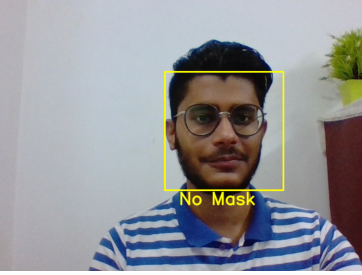

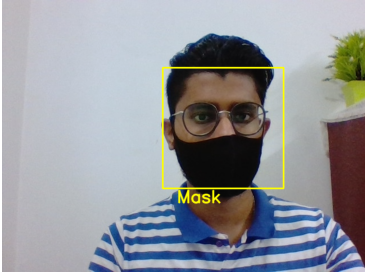

### Downloading Mask Detection Dataset from Kaggle
- Note : The dataset is same as the one mentioned in the assignment Google Drive link containing 1376 images.
- Kaggle is used to download the same dataset for easy access.

In [1]:
!pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

### **Downloading dataset from Kaggle**

In [7]:
! kaggle datasets download chandrasekarank/prajna-bhandary-face-mask-detection-dataset

 81% 41.0M/50.4M [00:00<00:00, 119MB/s]
100% 50.4M/50.4M [00:00<00:00, 142MB/s]


### **Unzipping the dataset**

In [10]:
!unzip prajna-bhandary-face-mask-detection-dataset.zip

In [3]:
import os
print('Length of Train Data with Mask : ',len(os.listdir('data/train/with_mask')))
print('Length of Train Data without Mask',len(os.listdir('data/train/without_mask')))

Length of Train Data with Mask :  658
Length of Train Data without Mask 657


In [4]:
import os
print('Length of Test Data with Mask : ',len(os.listdir('data/test/with_mask')))
print('Length of Test Data without Mask',len(os.listdir('data/test/without_mask')))

Length of Test Data with Mask :  97
Length of Test Data without Mask 97


In [5]:
import numpy as np 
import pandas as pd
import random
import cv2
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Utility Function to parse the dataset**

In [6]:
def parse_dataset(dataset_path, ext='jpg'):

    def parse_info_from_file(path):
        
        try:
            filename = os.path.split(path)
            
            status = filename[0].split('/')[2]

            return status
        except Exception as ex:
            return None
        
    files = glob.glob(os.path.join(dataset_path, "*.%s" % ext))

    # print(files)
    records = []
    for file in files:
        info = parse_info_from_file(file)
        records.append(info)
        
    df = pd.DataFrame(records)
    df['file'] = files
    df.columns = ['status','file']
    df = df.dropna()
    
    return df

### **Creating Train and Test Data**

In [7]:
dataset_folder_name = 'data/train/with_mask'
df = parse_dataset(dataset_folder_name)

train_df = df.copy()
dataset_folder_name = 'data/train/without_mask'
df = parse_dataset(dataset_folder_name)

train_df = pd.concat([train_df,df],axis=0)

train_df = train_df.reset_index(drop=1)
train_df.head()

,status,file
0,with_mask,data/train/with_mask\-110603108-gettyimages-53...
1,with_mask,data/train/with_mask\-110695084-mask2.jpg
2,with_mask,data/train/with_mask\0-with-mask.jpg
3,with_mask,data/train/with_mask\007563.jpg
4,with_mask,data/train/with_mask\1-respirator-mask.jpg


### **Data Exploration**

In [8]:
train_df.index.nunique()

1306

In [9]:
print('Unique Classes in Train Data : \n',train_df['status'].unique())
print()
print('Shape of Train Data : \n',train_df.shape)

Unique Classes in Train Data : 
 ['with_mask' 'without_mask']

Shape of Train Data : 
 (1306, 2)


In [10]:
dataset_folder_name = 'data/test/with_mask'
df = parse_dataset(dataset_folder_name)

test_df = df.copy()
dataset_folder_name = 'data/test/without_mask'
df = parse_dataset(dataset_folder_name)

test_df = pd.concat([test_df,df],axis=0)

test_df = test_df.reset_index(drop=1)

test_df.head()

,status,file
0,with_mask,data/test/with_mask\1-with-mask.jpg
1,with_mask,data/test/with_mask\106-with-mask.jpg
2,with_mask,data/test/with_mask\11-with-mask.jpg
3,with_mask,data/test/with_mask\110-with-mask.jpg
4,with_mask,data/test/with_mask\111-with-mask.jpg


In [11]:
print('Unique Classes in Test Data : \n',test_df['status'].unique())
print()
print('Shape of Test Data : \n',test_df.shape)

Unique Classes in Test Data : 
 ['with_mask' 'without_mask']

Shape of Test Data : 
 (194, 2)


### **Random data sample visualization**

(433, 320, 3)


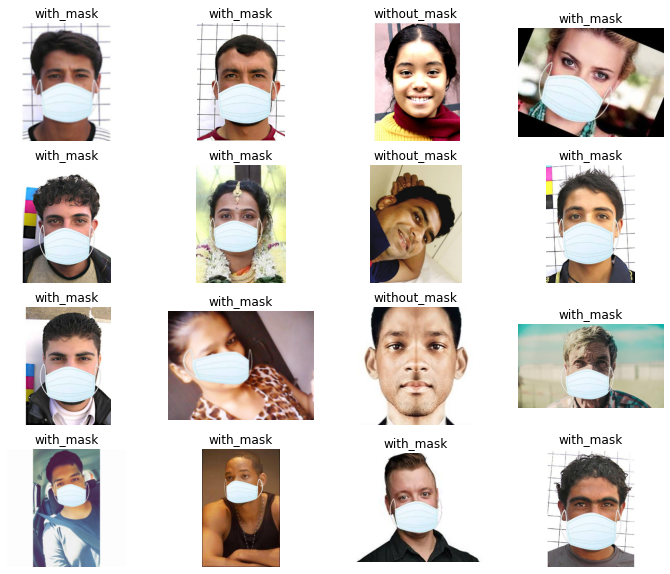

In [12]:
plt.figure(figsize=(12,10))

for en,i in enumerate(random.sample(range(1, 1000), 16)):
    temp = cv2.imread(train_df['file'][i])
    label = train_df['status'][i]
    plt.subplot(4,4,en+1);plt.imshow(temp[...,::-1]);plt.axis('off');plt.title(label);
print(temp.shape)

### **Dataset Class Disribution**

<AxesSubplot:>

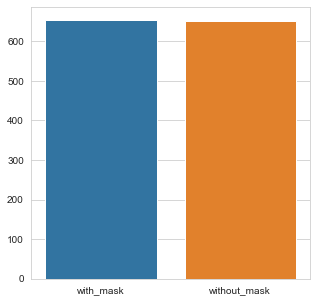

In [13]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.barplot(y=train_df['status'].value_counts().values.tolist(),x=train_df['status'].value_counts().index.tolist())

### **Importing Required Libraries**

In [14]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
import os

### **Initiating Image Data Generator**

In [15]:
train_datagen = ImageDataGenerator(
        validation_split=0.20,
        rescale=1/255.0,
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest")



### **Creating Train and Validation Data Generator**

In [36]:

train_generator = train_datagen.flow_from_dataframe(
#                         color_mode = 'grayscale',
                        dataframe=train_df,
                        x_col='file',
                        y_col='status',
                        subset="training",
                        batch_size=8,
                        seed=42,
                        shuffle=True,
                        class_mode="binary",
                        target_size=(150,150)
                        )

validation_generator = train_datagen.flow_from_dataframe(
#                         color_mode = 'grayscale',
                        dataframe=train_df,
                        x_col='file',
                        y_col='status',
                        subset="validation",
                        batch_size=8,
                        seed=42,
                        shuffle=True,
                        class_mode="binary",
                        target_size=(150,150)
                        )

Found 1044 validated image filenames belonging to 2 classes.
Found 261 validated image filenames belonging to 2 classes.


C:\Users\Sudarshan Paul\anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 1 invalid image filename(s) in x_col="file". These filename(s) will be ignored.
  warnings.warn(
C:\Users\Sudarshan Paul\anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 1 invalid image filename(s) in x_col="file". These filename(s) will be ignored.
  warnings.warn(


### **Defining CNN Model to detect Faces with and without Masks**

In [37]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### **Training the Model -30 Epochs**

In [38]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
# STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=30
)

<ipython-input-38-8f1c3a84812f>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/30
130/130 [==============================] - 35s 261ms/step - loss: 0.5492 - accuracy: 0.6988 - val_loss: 0.6008 - val_accuracy: 0.7031
Epoch 2/30
130/130 [==============================] - 35s 270ms/step - loss: 0.2887 - accuracy: 0.8803 - val_loss: 0.1887 - val_accuracy: 0.9570
Epoch 3/30
130/130 [==============================] - 35s 265ms/step - loss: 0.2248 - accuracy: 0.9247 - val_loss: 0.4277 - val_accuracy: 0.8242
Epoch 4/30
130/130 [==============================] - 34s 263ms/step - loss: 0.2283 - accuracy: 0.9141 - val_loss: 0.1748 - val_accuracy: 0.9570
Epoch 5/30
130/130 [==============================] - 34s 259ms/step - loss: 0.2696 - accuracy: 0.8967 - val_loss: 0.2341 - val_accuracy: 0.9180
Epoch 6/30
130/130 [==============================] - 34s 259ms/step - loss: 0.1992 - accuracy: 0.9199 - val_loss: 0.1896 - val_accuracy: 0.9336
Epoch 7/30
130/130 [==============================] - 34s 258ms/step - loss: 0.1707 - accuracy: 0.9392 - val_loss: 0.2238 - val_ac

In [33]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("data/test/without_mask").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

### **Creating Generator for Test Data**

In [51]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_dataframe(
#             color_mode='grayscale',
            dataframe=test_df,
            x_col="file",
            y_col=None,
            batch_size=1,
            seed=42,
            shuffle=True,
            class_mode=None,
            target_size=(150,150),
            )

Found 194 validated image filenames.


### **Mounting Drive for saving Model**

In [32]:
from google.colab import drive
drive.mount('content/',force_remount=1)

### **Saving Model**

In [ ]:
model.save('mask/')

### **Saving Model.h5**

In [40]:
model.save('model_mask_detection.h5')

### **Loading Saved Model**

In [ ]:
from keras.models import load_model

model = load_model('model_mask_detection.h5')

### **Model Summary**

In [41]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 17, 17, 32)      

### **Model Inference**

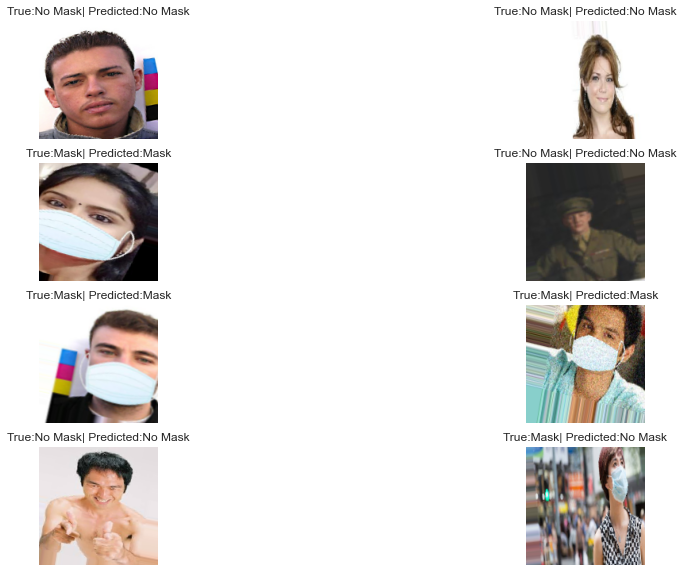

In [45]:
n=20
plt.figure(figsize=(16,10))

label_dict = {1:'No Mask', 0:'Mask'}


faces,label = next(train_generator)

for en,fl in enumerate(zip(faces,label)):
    if en==20:
      break
    f,l = fl 
    f = f.reshape(1,150,150,3)
    pred = round(model.predict(f)[0][0])

#     f*=255
    f = f.reshape((150,150,3))
    plt.subplot(4,2,en+1);plt.imshow(f,cmap='gray');plt.axis('off');plt.title('True:'+label_dict[l]+'| Predicted:'+label_dict[pred]);
    

### **Model Inference on Unseen Data**

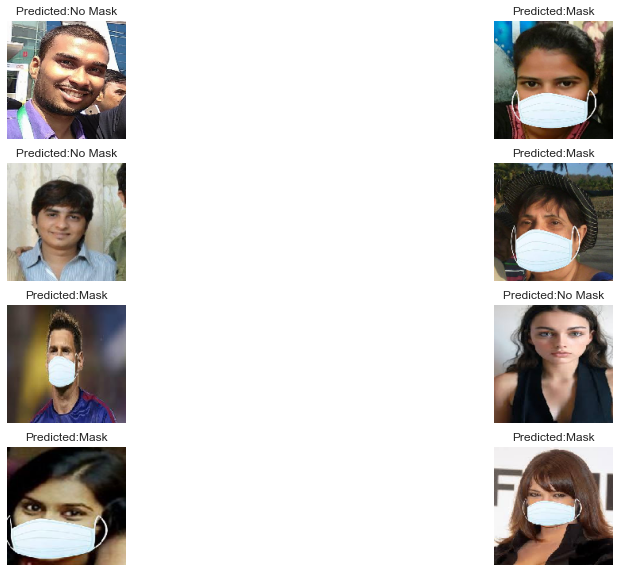

In [52]:
n=8
plt.figure(figsize=(16,10))

label_dict = {1:'No Mask', 0:'Mask'}

for i in range(n):
    f = next(test_generator)
    f = f.reshape(1,150,150,3)
    pred = round(model.predict(f)[0][0])

#     f*=255
    f = f.reshape((150,150,3))
    plt.subplot(4,2,i+1);plt.imshow(f,cmap='gray');plt.axis('off');plt.title('Predicted:'+label_dict[pred]);
    

### **Model Evaluation**

In [55]:
model.evaluate(validation_generator)

33/33 [==============================] - 5s 137ms/step - loss: 0.0498 - accuracy: 0.9808


[0.049818623811006546, 0.9808428883552551]

### **Saving Model History**

In [ ]:
np.save('mask_model_history.npy',history.history)

# history=np.load('my_history.npy',allow_pickle='TRUE').item()


### **Visualising Training Loss and Accuracy with each epoch**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


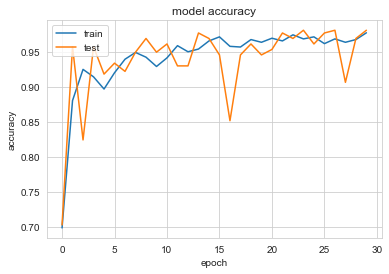

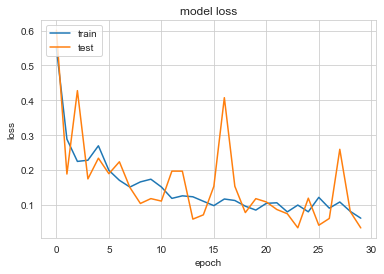

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(history.history.keys())
# summarize training for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Real Time Mask Detection using our trained model and Haar cascade Frontal Face Detector**

In [107]:

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')  

cap = cv2.VideoCapture(0)

label_dict = {1:'No Mask', 0:'Mask'}

while 1:
    
        ret, img = cap.read()
        
        
        
        faces = face_cascade.detectMultiScale(img, 1.3, 3)
        
        for (x,y,w,h) in faces:
                cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
                face_roi = img[y:y+h,x:x+w]
                face_roi = cv2.resize(face_roi,(150,150))
                
                face_roi = face_roi.reshape(1,150,150,3)
                pred = round(model.predict(face_roi)[0][0])
#                 print(model.predict(face_roi)[0][0])
                face_roi = face_roi.reshape((150,150,3))
                cv2.putText(img,label_dict[pred],(x+25,y+h+25), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,255), 2, cv2.LINE_AA) 
                
               
        cv2.imshow('img',img)
        if cv2.waitKey(1) == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()

In [109]:
cap.release()
cv2.destroyAllWindows()

### **Inference on Real Time Feed (Un-Masked)**

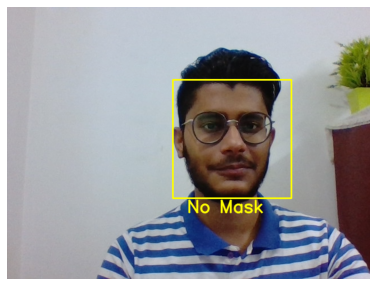

In [106]:
plt.figure(figsize=(18,5))
plt.imshow(img[...,::-1]);plt.axis('off');

### **Inference on Real Time (Masked)**

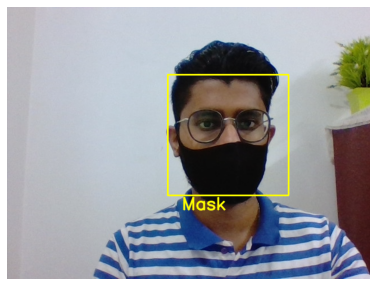

In [108]:
plt.figure(figsize=(18,5))
plt.imshow(img[...,::-1]);plt.axis('off');